# Readme embedding evaluation (41 repostitories / test set)

## 1. Loading repository information

In [22]:
!pip install gdown
!gdown 1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_

Downloading...
From: https://drive.google.com/uc?id=1EE5y_u2_RTWk0k1Z2RwELj1eHoc7WeH_
To: /content/repo_info_test.pkl
100% 19.8M/19.8M [00:00<00:00, 46.7MB/s]


In [23]:
import pickle

with open("repo_info_test.pkl", "rb") as f:
    repo_info = pickle.load(f)
    f.close()

## 2. Download pre-trained model

In [24]:
!pip3 install torch
!pip3 install transformers
!wget https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
# !curl -O https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py

--2023-07-09 18:33:53--  https://raw.githubusercontent.com/microsoft/CodeBERT/master/UniXcoder/unixcoder.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10352 (10K) [text/plain]
Saving to: ‘unixcoder.py’

unixcoder.py        100%[===================>]  10.11K  --.-KB/s    in 0s      

2023-07-09 18:33:53 (41.0 MB/s) - ‘unixcoder.py’ saved [10352/10352]



In [25]:
import torch

device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(device)

cuda


In [26]:
unixcoder_model_names = [
    "Lazyhope/unixcoder-nine-advtest",
]

In [27]:
from unixcoder import UniXcoder

unixcoder_models = {}

# Initialise unixcoder model
for u_name in unixcoder_model_names:
    unixcoder_models[u_name] = UniXcoder(u_name)
    unixcoder_models[u_name].to(device)

## 3. Generating readme embeddings

In [28]:
# Getting readme embeddings
def get_unixcoder_embeddings(data, model):
    tokens_ids = model.tokenize([data], max_length=512, mode="<encoder-only>")
    source_ids = torch.tensor(tokens_ids).to(device)
    _, embeddings = model(source_ids)
    return embeddings

# Getting other embbeddings
def get_other_embeddings(data_list):
    embeddings = {}

    # Unixcoder model
    for u_name, u_model in tqdm(unixcoder_models.items()):
        print(f" - Using {u_name} model - ")
        embeddings_list = torch.concat([get_unixcoder_embeddings(data, u_model) for data in data_list])
        embeddings[u_name] = embeddings_list

    return embeddings


# Getting embeddings
def get_embeddings(input_data=None, input_mode=None):
    if input_data is None or not input_data:
        return torch.zeros((768,), device=device)

    with torch.no_grad():
        if input_mode == "readme":
            return get_other_embeddings(input_data)


In [29]:
from tqdm import tqdm

for repo_name, repo_dict in tqdm(repo_info.items()):
    print(f" - Generating readme embeddings for {repo_name} - ")
    repo_dict["readme_embeddings"] = get_embeddings(input_data=repo_dict["readme"], input_mode="readme")

  0%|          | 0/41 [00:00<?, ?it/s]

 - Generating readme embeddings for ellisonleao/pyshorteners - 



100%|██████████| 1/1 [00:00<00:00, 55.31it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for sloria/doitlive - 



100%|██████████| 1/1 [00:00<00:00, 43.52it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for sebastien/cuisine - 



100%|██████████| 1/1 [00:00<00:00, 50.85it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for lepture/authlib - 



 10%|▉         | 4/41 [00:00<00:01, 29.04it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for inducer/pudb - 



100%|██████████| 1/1 [00:00<00:00, 41.26it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for uber/pyflame - 



100%|██████████| 1/1 [00:00<00:00, 42.95it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for aws/aws-cli - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 17%|█▋        | 7/41 [00:00<00:01, 27.55it/s]

 - Generating readme embeddings for DamnWidget/anaconda - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 11.40it/s]


 - Generating readme embeddings for pykong/copier - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 18.78it/s]


 - Generating readme embeddings for FactoryBoy/factory_boy - 



 24%|██▍       | 10/41 [00:00<00:01, 20.56it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for pynamodb/PynamoDB - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 28.29it/s]


 - Generating readme embeddings for jschneier/django-storages - 



100%|██████████| 1/1 [00:00<00:00, 51.10it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for robotframework/robotframework - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 32%|███▏      | 13/41 [00:00<00:01, 18.38it/s]

 - Generating readme embeddings for mininet/mininet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 21.72it/s]


 - Generating readme embeddings for ztane/python-Levenshtein - 



100%|██████████| 1/1 [00:00<00:00, 48.92it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for audreyr/cookiecutter - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 



 39%|███▉      | 16/41 [00:01<00:02, 10.52it/s]

 - Generating readme embeddings for google/python-fire - 



100%|██████████| 1/1 [00:00<00:00, 29.79it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for pycco-docs/pycco - 



100%|██████████| 1/1 [00:00<00:00, 63.92it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for rossgoodwin/hmap - 



100%|██████████| 1/1 [00:00<00:00, 49.06it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for idan/oauthlib - 



 49%|████▉     | 20/41 [00:01<00:01, 14.56it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for paramiko/paramiko - 



100%|██████████| 1/1 [00:00<00:00, 56.85it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for kevin1024/vcrpy - 



100%|██████████| 1/1 [00:00<00:00, 50.71it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for platformio/platformio-core - 



100%|██████████| 1/1 [00:00<00:00, 46.92it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for graphql-python/graphene - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 59%|█████▊    | 24/41 [00:01<00:00, 18.09it/s]

 - Generating readme embeddings for klen/mixer - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 29.39it/s]


 - Generating readme embeddings for seatgeek/sixpack - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 29.23it/s]


 - Generating readme embeddings for bpython/bpython - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 66%|██████▌   | 27/41 [00:01<00:00, 19.62it/s]

 - Generating readme embeddings for dfunckt/django-rules - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 15.33it/s]


 - Generating readme embeddings for coleifer/peewee - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 22.02it/s]


 - Generating readme embeddings for pythonnet/pythonnet - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 73%|███████▎  | 30/41 [00:01<00:00, 18.80it/s]

 - Generating readme embeddings for python/typeshed - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 13.25it/s]


 - Generating readme embeddings for KoffeinFlummi/Chronyk - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 28.61it/s]


 - Generating readme embeddings for isnowfy/snownlp - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 80%|████████  | 33/41 [00:01<00:00, 18.55it/s]

 - Generating readme embeddings for alecthomas/voluptuous - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 23.58it/s]


 - Generating readme embeddings for spulec/freezegun - 



100%|██████████| 1/1 [00:00<00:00, 37.93it/s]


 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for maxmind/geoip-api-python - 



 88%|████████▊ | 36/41 [00:01<00:00, 20.66it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 
 - Generating readme embeddings for pallets/werkzeug - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 26.53it/s]


 - Generating readme embeddings for nvbn/thefuck - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 18.49it/s]


 - Generating readme embeddings for benfred/implicit - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


 95%|█████████▌| 39/41 [00:02<00:00, 19.72it/s]

 - Generating readme embeddings for erikrose/more-itertools - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 1/1 [00:00<00:00, 21.50it/s]


 - Generating readme embeddings for PyMySQL/mysqlclient-python - 



  0%|          | 0/1 [00:00<?, ?it/s]

 - Using Lazyhope/unixcoder-nine-advtest model - 


100%|██████████| 41/41 [00:02<00:00, 18.50it/s]


## 4. Saving readme embeddings

In [30]:
save_device = "cpu"
# Change the tensor format to CPU
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["readme_embeddings"]) is torch.Tensor:
        repo_info[repo_name]["readme_embeddings"] = repo_info[repo_name]["readme_embeddings"].to(save_device)
    else:
        for model_name, model_tensor in repo_dict["readme_embeddings"].items():
            repo_info[repo_name]["readme_embeddings"][model_name] = model_tensor.to(save_device)

In [31]:
# Check the tensor format
for repo_name, repo_dict in repo_info.items():
    if type(repo_dict["readme_embeddings"]) is torch.Tensor:
        print(repo_dict["readme_embeddings"].get_device())
    else:
        for model_name, model_tensor in repo_dict["readme_embeddings"].items():
             print(repo_info[repo_name]["readme_embeddings"][model_name].get_device())

-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1
-1


In [32]:
with open("repo_info_test_readme_embeddings.pkl", "wb") as f:
    pickle.dump(repo_info, f)
    f.close()

## 5. Calculating similarity

In [33]:
from torch.nn import CosineSimilarity
from itertools import combinations
import pandas as pd

cossim = CosineSimilarity(dim=0, eps=1e-8)
res = []
num_of_repos = len(repo_info)
num_of_rows = num_of_repos * (num_of_repos - 1) // 2

models = unixcoder_model_names

for repo1, repo2 in tqdm(combinations(repo_info.keys(), 2), total=num_of_rows):
    row = [repo1, repo2, repo_info[repo1]["topic"], repo_info[repo2]["topic"]]
    for model_name in models:

        if type(repo_info[repo1]["readme_embeddings"]) is torch.Tensor:
            embedding1 = repo_info[repo1]["readme_embeddings"]
        else:
            embedding1 = torch.mean(repo_info[repo1]["readme_embeddings"][model_name], dim=0)

        if type(repo_info[repo2]["readme_embeddings"]) is torch.Tensor:
            embedding2 = repo_info[repo2]["readme_embeddings"]
        else:
            embedding2 = torch.mean(repo_info[repo2]["readme_embeddings"][model_name], dim=0)

        similarity = cossim(embedding1, embedding2).cpu().detach().numpy().item()
        row.append(similarity)

    res.append(row)

df = pd.DataFrame(res, columns=["repo1", "repo2", "topic1", "topic2"] + models)
df

100%|██████████| 820/820 [00:00<00:00, 14745.75it/s]


,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.352250
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.153990
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.375606
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.297272
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.265967
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.187190
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.327744
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.306023
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,0.255893


In [34]:
df.dropna(inplace=True, subset=models)
df.reset_index(drop=True, inplace=True)
df

,repo1,repo2,topic1,topic2,Lazyhope/unixcoder-nine-advtest
0,ellisonleao/pyshorteners,sloria/doitlive,URL Manipulation,Productivity CLI Tools,0.352250
1,ellisonleao/pyshorteners,sebastien/cuisine,URL Manipulation,SSH-style Deployment,0.153990
2,ellisonleao/pyshorteners,lepture/authlib,URL Manipulation,OAuth,0.375606
3,ellisonleao/pyshorteners,inducer/pudb,URL Manipulation,pdb-like Debugger,0.297272
4,ellisonleao/pyshorteners,uber/pyflame,URL Manipulation,Profiler,0.265967
...,...,...,...,...,...
815,nvbn/thefuck,erikrose/more-itertools,Productivity CLI Tools,Functional Programming,0.187190
816,nvbn/thefuck,PyMySQL/mysqlclient-python,Productivity CLI Tools,MySQL,0.327744
817,benfred/implicit,erikrose/more-itertools,Recommender Systems,Functional Programming,0.306023
818,benfred/implicit,PyMySQL/mysqlclient-python,Recommender Systems,MySQL,0.255893


In [35]:
df.to_csv("readme_embedding_evaluation_test_41.csv")

## 6. Evaluating different models

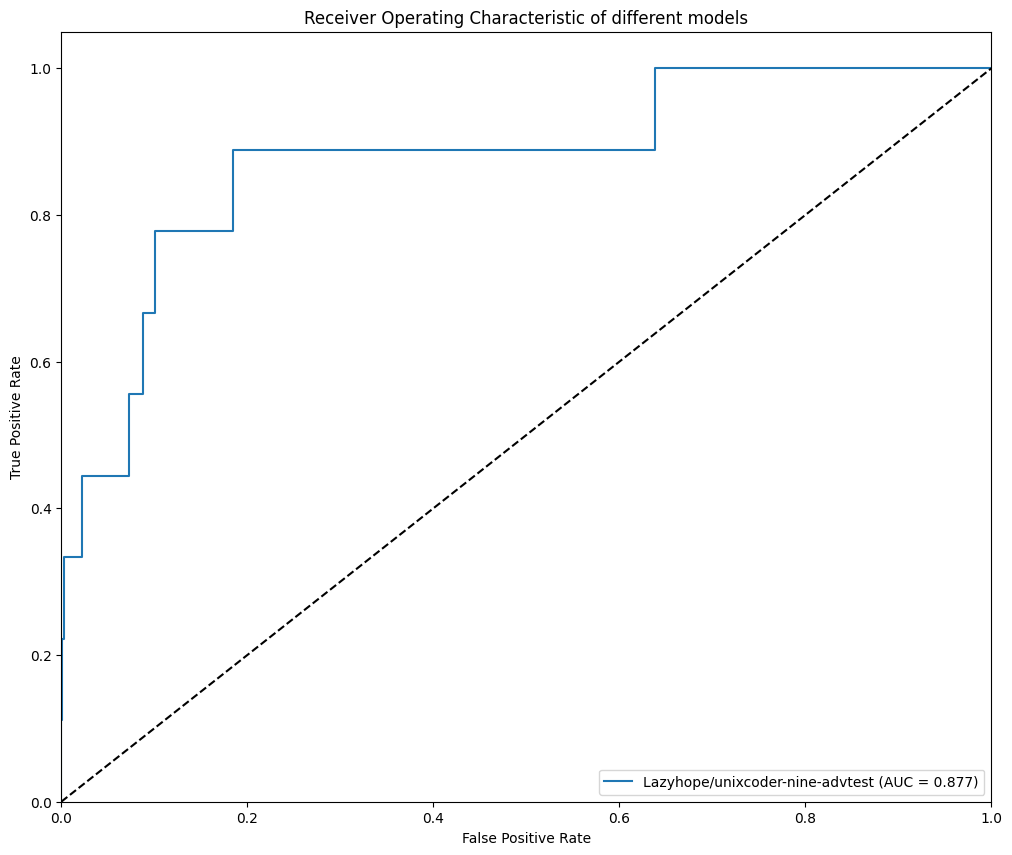

In [36]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

model_auc = {}
y_true = df['topic1'] == df['topic2']
fig = plt.figure(figsize=(12, 10))


def roc(model_name):
    y_score = df[model_name]
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)
    model_auc[model_name] = roc_auc

    plt.plot(fpr, tpr, label=model_name)


for model in models:
    roc(model)

# Order labels by each model's auc score
handles, labels = plt.gca().get_legend_handles_labels()
order = sorted(range(len(labels)), key=lambda k: -model_auc[labels[k]])
ordered_handles = [handles[idx] for idx in order]
ordered_labels = [f'{labels[idx]} (AUC = {model_auc[labels[idx]]:.3f})' for idx in order]
plt.legend(ordered_handles, ordered_labels, loc="lower right")

plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'Receiver Operating Characteristic of different models')
plt.savefig('roc_readme_evaluation_test_41.png')
plt.show()

In [37]:
model_auc

{'Lazyhope/unixcoder-nine-advtest': 0.8765584326620085}